<h1>Japanese Restaurants</h1>
<h2>Wrangling and preparation</h2>
<p>
   What do you have to do in this weekely assignment:
<ul>
    <li>Load and show some tables</li>
    <li>Combine Reservations data from hpg_reserve and air_reserve</li>
    <li>Add a calculated column: the difference in days between a visit and reservation</li>
    <li>Group individual reservations by restaurant and day and calculate the total number of reservations (per restaurant and per day) </li>
    <li>Make a selection of the data and show this</li>
    <li>group individual reservations by restaurant and day and calculate mean of the column diff_reservation_visit (per restaurant and per day)</li>
    <li>Merge the two sets of grouped data into one table</li>
    <li>Add extra date-columns (weekday, year, month) for other possible selection purposes</li>
    <li>Include a boolean holiday column</li>
    <li>Check for missing values</li>
    <li>Save the resulting table to a csv</li>
    <li>Calculate a rolling mean of visitors</li>
    <li>Show the number of visitors in a graph</li>
</ul>
</p>

In [1]:
import pandas as pd
import numpy as np

In [2]:
#path='../data/'
path = "C:/Users/kleis500/Eclipse workspace/kaggle/japan restaurant/data/"
air_reservations=pd.read_csv(path+'air_reserve.csv')
hpg_reservations=pd.read_csv(path+'hpg_reserve.csv')
id_relation=pd.read_csv(path+'store_id_relation.csv')

<h2>Show the tables to get a feeling about the data</h2> 

In [3]:
air_reservations.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [4]:
hpg_reservations.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [5]:
id_relation.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


<h2>Combine Reservations data from hpg_reserve and air_reserve</h2>
<p>
    We neglect the rest of hpg reservations (maybe use them later for statistical purposes), and deal air reservations only 
</p>
<p> First we do an inner-merge on the hpg reservations data, with the id_relation data, in order to filter out the hpg-restaurants (which all have an hpg_store_id), that also do have an air_store_id,  
    </p>

In [6]:
hpg_reservations = pd.merge(hpg_reservations, id_relation, how='inner', on=['hpg_store_id'])

In [7]:
hpg_reservations.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_store_id
0,hpg_878cc70b1abc76f7,2016-01-01 19:00:00,2016-01-01 15:00:00,4,air_db80363d35f10926
1,hpg_878cc70b1abc76f7,2016-01-02 19:00:00,2016-01-02 14:00:00,2,air_db80363d35f10926
2,hpg_878cc70b1abc76f7,2016-01-03 18:00:00,2016-01-02 20:00:00,6,air_db80363d35f10926
3,hpg_878cc70b1abc76f7,2016-01-06 20:00:00,2016-01-04 22:00:00,3,air_db80363d35f10926
4,hpg_878cc70b1abc76f7,2016-01-11 18:00:00,2016-01-11 14:00:00,2,air_db80363d35f10926


In [8]:
air_reservations.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [9]:
print("#hpg-reservations",hpg_reservations.shape)
print("#air-reservations",air_reservations.shape)

#hpg-reservations (28183, 5)
#air-reservations (92378, 4)


<p>Next, we merge the events of both tables</p>

In [10]:
reservations= pd.concat([hpg_reservations,air_reservations])
reservations=reservations.drop(['hpg_store_id'],axis=1)
print("#reservations",reservations.shape)
reservations.head()

#reservations (120561, 4)


,air_store_id,reserve_datetime,reserve_visitors,visit_datetime
0,air_db80363d35f10926,2016-01-01 15:00:00,4,2016-01-01 19:00:00
1,air_db80363d35f10926,2016-01-02 14:00:00,2,2016-01-02 19:00:00
2,air_db80363d35f10926,2016-01-02 20:00:00,6,2016-01-03 18:00:00
3,air_db80363d35f10926,2016-01-04 22:00:00,3,2016-01-06 20:00:00
4,air_db80363d35f10926,2016-01-11 14:00:00,2,2016-01-11 18:00:00


<p>Make date_time columns of <b>type</b> date</p>

In [11]:
reservations['visit_date'] = pd.to_datetime(reservations['visit_datetime']).dt.date
reservations['reserve_date'] = pd.to_datetime(reservations['reserve_datetime']).dt.date

<h2><p>Add a calculated column: the difference in days between a visit and reservation</p></h2>

In [12]:
reservations['reserve_date_diff'] = reservations.apply(lambda r: (r['visit_date'] - r['reserve_date']).days, axis=1)
reservations.head()

,air_store_id,reserve_datetime,reserve_visitors,visit_datetime,visit_date,reserve_date,reserve_date_diff
0,air_db80363d35f10926,2016-01-01 15:00:00,4,2016-01-01 19:00:00,2016-01-01,2016-01-01,0
1,air_db80363d35f10926,2016-01-02 14:00:00,2,2016-01-02 19:00:00,2016-01-02,2016-01-02,0
2,air_db80363d35f10926,2016-01-02 20:00:00,6,2016-01-03 18:00:00,2016-01-03,2016-01-02,1
3,air_db80363d35f10926,2016-01-04 22:00:00,3,2016-01-06 20:00:00,2016-01-06,2016-01-04,2
4,air_db80363d35f10926,2016-01-11 14:00:00,2,2016-01-11 18:00:00,2016-01-11,2016-01-11,0


<h2><p>Group the individual reservations per restaurant per day </p> </h2>

In [13]:
visitors_per_day = reservations.groupby(['air_store_id','visit_date'],as_index=False)['reserve_visitors'].sum().rename(columns={'reserve_visitors':'sum_visitors'})
visitors_per_day.head()

,air_store_id,visit_date,sum_visitors
0,air_00a91d42b08b08d9,2016-01-14,2
1,air_00a91d42b08b08d9,2016-01-15,4
2,air_00a91d42b08b08d9,2016-01-16,2
3,air_00a91d42b08b08d9,2016-01-22,2
4,air_00a91d42b08b08d9,2016-01-29,5


<h2><p>Make a selection of the data and show this</p></h2>

In [14]:
from_datetime="2016-01-01 00:00:00"
to_datetime="2017-01-02 00:00:00"
air_id="air_db80363d35f10926"
# create a date_time column, and filter using a 'mask' 
visitors_per_day['visit_datetime'] = pd.to_datetime(visitors_per_day['visit_date'])
mask = (visitors_per_day['visit_datetime']>=from_datetime) & (visitors_per_day['visit_datetime'] <= to_datetime) & (visitors_per_day['air_store_id']==air_id)
# not necessary, but one is allowed to remove that superfluous column here
visitors_per_day=visitors_per_day.drop(['visit_datetime'], axis=1)

selected= visitors_per_day.loc[mask]
print("from", from_datetime,"to",to_datetime,"aantal:",len(selected))
selected.head(5)

from 2016-01-01 00:00:00 to 2017-01-02 00:00:00 aantal: 198


,air_store_id,visit_date,sum_visitors
35963,air_db80363d35f10926,2016-01-01,9
35964,air_db80363d35f10926,2016-01-02,36
35965,air_db80363d35f10926,2016-01-03,23
35966,air_db80363d35f10926,2016-01-06,8
35967,air_db80363d35f10926,2016-01-08,23


<h2><p>group by restaurant and day and calculate mean of the column diff_reservation_visit</p></h2>

In [15]:
mean_reserve_date_diff_per_day = reservations.groupby(['air_store_id','visit_date'], as_index=False)[['reserve_date_diff']].sum().rename(columns={'reserve_date_diff': 'avg_diff_reservation_visit_days'})
mean_reserve_date_diff_per_day.head()

,air_store_id,visit_date,avg_diff_reservation_visit_days
0,air_00a91d42b08b08d9,2016-01-14,3
1,air_00a91d42b08b08d9,2016-01-15,6
2,air_00a91d42b08b08d9,2016-01-16,3
3,air_00a91d42b08b08d9,2016-01-22,3
4,air_00a91d42b08b08d9,2016-01-29,6


<h2>Merge the grouped data</h2>

In [16]:
day_data=pd.merge(visitors_per_day, mean_reserve_date_diff_per_day, how='inner', on=['air_store_id','visit_date'])
day_data.head()

,air_store_id,visit_date,sum_visitors,avg_diff_reservation_visit_days
0,air_00a91d42b08b08d9,2016-01-14,2,3
1,air_00a91d42b08b08d9,2016-01-15,4,6
2,air_00a91d42b08b08d9,2016-01-16,2,3
3,air_00a91d42b08b08d9,2016-01-22,2,3
4,air_00a91d42b08b08d9,2016-01-29,5,6


<h2>add extra date-columns (weekday, year, month) for other possible selection purposes</h2>

In [17]:
day_data['visit_datetime'] = pd.to_datetime(day_data['visit_date'])
day_data['weekday'] = day_data['visit_datetime'].dt.weekday
day_data['weekday_name'] = day_data['visit_datetime'].dt.weekday_name
day_data['year'] = day_data['visit_datetime'].dt.year
day_data['month'] = day_data['visit_datetime'].dt.month
day_data.head()


,air_store_id,visit_date,sum_visitors,avg_diff_reservation_visit_days,visit_datetime,weekday,weekday_name,year,month
0,air_00a91d42b08b08d9,2016-01-14,2,3,2016-01-14,3,Thursday,2016,1
1,air_00a91d42b08b08d9,2016-01-15,4,6,2016-01-15,4,Friday,2016,1
2,air_00a91d42b08b08d9,2016-01-16,2,3,2016-01-16,5,Saturday,2016,1
3,air_00a91d42b08b08d9,2016-01-22,2,3,2016-01-22,4,Friday,2016,1
4,air_00a91d42b08b08d9,2016-01-29,5,6,2016-01-29,4,Friday,2016,1


In [18]:
day_data.head()

,air_store_id,visit_date,sum_visitors,avg_diff_reservation_visit_days,visit_datetime,weekday,weekday_name,year,month
0,air_00a91d42b08b08d9,2016-01-14,2,3,2016-01-14,3,Thursday,2016,1
1,air_00a91d42b08b08d9,2016-01-15,4,6,2016-01-15,4,Friday,2016,1
2,air_00a91d42b08b08d9,2016-01-16,2,3,2016-01-16,5,Saturday,2016,1
3,air_00a91d42b08b08d9,2016-01-22,2,3,2016-01-22,4,Friday,2016,1
4,air_00a91d42b08b08d9,2016-01-29,5,6,2016-01-29,4,Friday,2016,1


<h2> include holiday-column</h2>

In [19]:
holidays=pd.read_csv(path+'date_info.csv').rename(columns={'calendar_date':'visit_date'})
holidays.head()

,visit_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [20]:
holidays['visit_date'] = pd.to_datetime(holidays['visit_date']).dt.date
total = pd.merge(day_data, holidays, how='left', on=['visit_date']) 
total.head()

,air_store_id,visit_date,sum_visitors,avg_diff_reservation_visit_days,visit_datetime,weekday,weekday_name,year,month,day_of_week,holiday_flg
0,air_00a91d42b08b08d9,2016-01-14,2,3,2016-01-14,3,Thursday,2016,1,Thursday,0
1,air_00a91d42b08b08d9,2016-01-15,4,6,2016-01-15,4,Friday,2016,1,Friday,0
2,air_00a91d42b08b08d9,2016-01-16,2,3,2016-01-16,5,Saturday,2016,1,Saturday,0
3,air_00a91d42b08b08d9,2016-01-22,2,3,2016-01-22,4,Friday,2016,1,Friday,0
4,air_00a91d42b08b08d9,2016-01-29,5,6,2016-01-29,4,Friday,2016,1,Friday,0


<h2>check for missing values</h2>

In [21]:
total.isnull().sum()

air_store_id                       0
visit_date                         0
sum_visitors                       0
avg_diff_reservation_visit_days    0
visit_datetime                     0
weekday                            0
weekday_name                       0
year                               0
month                              0
day_of_week                        0
holiday_flg                        0
dtype: int64

<h2> save the resulting table to a csv file</h2>

In [22]:
total.to_csv(path+"reservation_data.csv",sep=";")

<h2>rolling mean</h2>


In [23]:
air_id="air_db80363d35f10926"
mask = total['air_store_id']==air_id
restaurant= total.loc[mask]
restaurant.head(5)

,air_store_id,visit_date,sum_visitors,avg_diff_reservation_visit_days,visit_datetime,weekday,weekday_name,year,month,day_of_week,holiday_flg
35963,air_db80363d35f10926,2016-01-01,9,0,2016-01-01,4,Friday,2016,1,Friday,1
35964,air_db80363d35f10926,2016-01-02,36,2,2016-01-02,5,Saturday,2016,1,Saturday,1
35965,air_db80363d35f10926,2016-01-03,23,4,2016-01-03,6,Sunday,2016,1,Sunday,1
35966,air_db80363d35f10926,2016-01-06,8,5,2016-01-06,2,Wednesday,2016,1,Wednesday,0
35967,air_db80363d35f10926,2016-01-08,23,6,2016-01-08,4,Friday,2016,1,Friday,0


In [24]:
#https://stackoverflow.com/questions/15771472/pandas-rolling-mean-by-time-interval
restaurant=restaurant.set_index('visit_datetime')
restaurant.head()

,air_store_id,visit_date,sum_visitors,avg_diff_reservation_visit_days,weekday,weekday_name,year,month,day_of_week,holiday_flg
visit_datetime,,,,,,,,,,
2016-01-01,air_db80363d35f10926,2016-01-01,9,0,4,Friday,2016,1,Friday,1
2016-01-02,air_db80363d35f10926,2016-01-02,36,2,5,Saturday,2016,1,Saturday,1
2016-01-03,air_db80363d35f10926,2016-01-03,23,4,6,Sunday,2016,1,Sunday,1
2016-01-06,air_db80363d35f10926,2016-01-06,8,5,2,Wednesday,2016,1,Wednesday,0
2016-01-08,air_db80363d35f10926,2016-01-08,23,6,4,Friday,2016,1,Friday,0


In [25]:
restaurant['RollingMean']=restaurant['sum_visitors'].rolling(window=7).mean()
#df['MA'] = df['pop'].rolling(window=5,center=False).mean()
restaurant

,air_store_id,visit_date,sum_visitors,avg_diff_reservation_visit_days,weekday,weekday_name,year,month,day_of_week,holiday_flg,RollingMean
visit_datetime,,,,,,,,,,,
2016-01-01,air_db80363d35f10926,2016-01-01,9,0,4,Friday,2016,1,Friday,1,NaN
2016-01-02,air_db80363d35f10926,2016-01-02,36,2,5,Saturday,2016,1,Saturday,1,NaN
2016-01-03,air_db80363d35f10926,2016-01-03,23,4,6,Sunday,2016,1,Sunday,1,NaN
2016-01-06,air_db80363d35f10926,2016-01-06,8,5,2,Wednesday,2016,1,Wednesday,0,NaN
2016-01-08,air_db80363d35f10926,2016-01-08,23,6,4,Friday,2016,1,Friday,0,NaN
2016-01-09,air_db80363d35f10926,2016-01-09,18,1,5,Saturday,2016,1,Saturday,0,NaN
2016-01-10,air_db80363d35f10926,2016-01-10,37,7,6,Sunday,2016,1,Sunday,0,22.000000
2016-01-11,air_db80363d35f10926,2016-01-11,4,0,0,Monday,2016,1,Monday,1,21.285714
2016-01-12,air_db80363d35f10926,2016-01-12,6,16,1,Tuesday,2016,1,Tuesday,0,17.000000


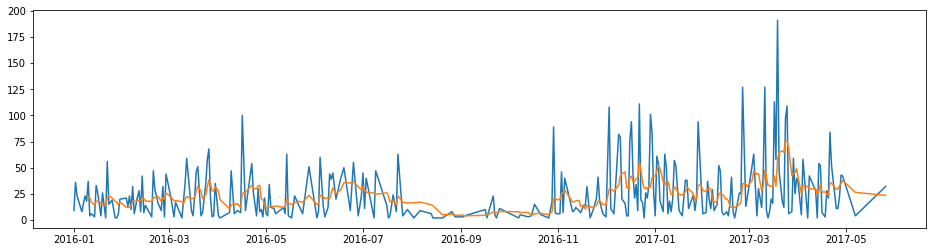

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(16, 4)) 
plt.plot(restaurant['sum_visitors'])
plt.plot(restaurant['RollingMean'])
